In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
% cd /content/drive/My Drive/vianie_ASTRO361/Lab 7 Radio Imaging of Sun/

/content/drive/My Drive/vianie_ASTRO361/Lab 7 Radio Imaging of Sun


In [4]:
# Setup
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
import csv
from glob import glob
from scipy.optimize import curve_fit
%matplotlib inline
from matplotlib.font_manager import FontProperties
rc('figure', figsize=(12.0, 9.0))
fontP = FontProperties()
fontP.set_size('large')

['Radio Data Sun/sun_az_m00', 'Radio Data Sun/sun_az_m02', 'Radio Data Sun/sun_az_m04', 'Radio Data Sun/sun_az_m06', 'Radio Data Sun/sun_az_m08', 'Radio Data Sun/sun_az_m10', 'Radio Data Sun/sun_az_p02', 'Radio Data Sun/sun_az_p04', 'Radio Data Sun/sun_az_p06', 'Radio Data Sun/sun_az_p08', 'Radio Data Sun/sun_az_p10', 'Radio Data Sun/sun_el_m00', 'Radio Data Sun/sun_el_m02', 'Radio Data Sun/sun_el_m04', 'Radio Data Sun/sun_el_m06', 'Radio Data Sun/sun_el_m08', 'Radio Data Sun/sun_el_m10', 'Radio Data Sun/sun_el_p02', 'Radio Data Sun/sun_el_p04', 'Radio Data Sun/sun_el_p06']


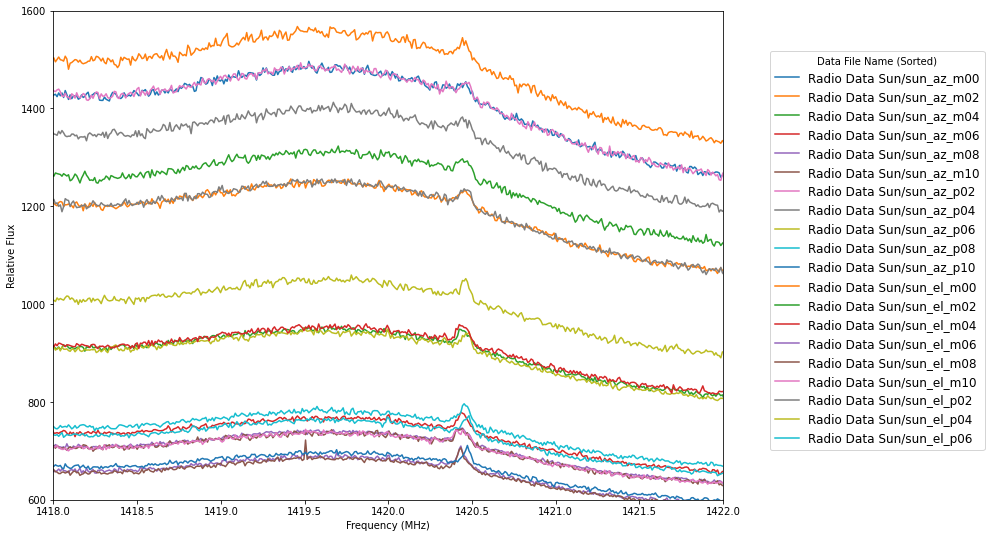

In [5]:
#So step number one is to plot one of your spectra as frequency vs. flux

# Data import
datadir='Radio Data Sun'
filenames = glob(datadir + "/sun*")
filenames.sort()
print(filenames)

for l in filenames:
  f = open(l)
  lines = f.readlines()
  f.close()
  data = []
  data_t = np.zeros([1024])

  # Every fourth line is a separate spectrum at a different time
  # Must parse the 4th line into floats for numpy array
  i = 0
  j = 0
  while i <= len(lines)-1:
    k = 3 + i
    data = np.fromstring(lines[k],dtype=float, sep = ' ')
    data_t += data
    i += 4
    j += 1
  data_t = data_t / j # Taking the mean of each file 

  # Graph Details
  x = np.arange(1416,1426,0.009766)
  plt.xlim(1418,1422)
  plt.ylim(600,1600)
  plt.plot(x,data_t, label=l)
  plt.xlabel("Frequency (MHz)")
  plt.ylabel("Relative Flux")
  plt.legend(title='Data File Name (Sorted)', bbox_to_anchor=(1.4, 0.93), loc='upper right', prop=fontP)

['Radio Data Sun/sun_az_m00', 'Radio Data Sun/sun_az_m02', 'Radio Data Sun/sun_az_m04', 'Radio Data Sun/sun_az_m06', 'Radio Data Sun/sun_az_m08', 'Radio Data Sun/sun_az_m10', 'Radio Data Sun/sun_az_p02', 'Radio Data Sun/sun_az_p04', 'Radio Data Sun/sun_az_p06', 'Radio Data Sun/sun_az_p08', 'Radio Data Sun/sun_az_p10']
[810.11816501   0.9930172    3.34310064 641.09884701]


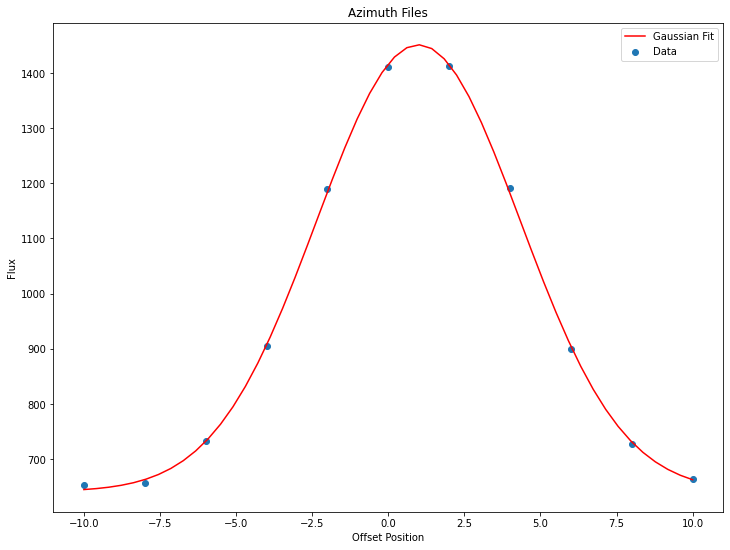

In [6]:
# Data import
datadir='Radio Data Sun'
filenames = glob(datadir + "/sun_az*") # Now only read in azimuth files
filenames.sort()
print(filenames)

run_avgflux = []
flux = np.zeros(9)

# Same reading method as last cell
for l in filenames:
  f = open(l)
  lines = f.readlines()
  f.close()
  data = []
  mean_t = np.zeros([1024])
  data_t = np.zeros([1024])

  # Every fourth line is a separate spectrum at a different time
  # Must parse the 4th line into floats for numpy array
  i = 0
  j = 0
  while i <= len(lines)-1:
    k = 3 + i
    data = np.fromstring(lines[k],dtype=float, sep = ' ')
    data_t += data
    i += 4
    j += 1
  data_t = data_t / j # Taking the mean of each file 

  # For every file, find average flux
  avgflux = np.zeros(len(data_t))
  avgflux = np.mean(data_t[200:600]) # Using the same x-range as above
  run_avgflux.append(avgflux)

# x-range from -10 to 10 degrees, as data files are labeled 
loc = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
flux = np.array([run_avgflux[5], run_avgflux[4], run_avgflux[3], run_avgflux[2], run_avgflux[1], run_avgflux[0], run_avgflux[6], run_avgflux[7], run_avgflux[8], run_avgflux[9], run_avgflux[10]])

# Graph Details
plt.scatter(loc,flux, label = 'Data')
plt.xlabel("Offset Position")
plt.ylabel("Flux")
plt.title("Azimuth Files")

# Fitting a Gaussian
# Define more detailed x array so the fit is smooth
loc2 = np.linspace(-10,10)

# Gaussian fit plus a background (d)
def gaus(x,a,x0,sigma,d):
    return a*np.exp(-np.power((x - x0), 2.)/(2. * sigma**2.)) + d
    
p0 = [max(flux), -4., 3., 1.] # Starter values
coeff, var_matrix = curve_fit(gaus, loc, flux, p0=p0)
fit1 = gaus(loc2, *coeff) 

# Graph
plt.plot(loc2,fit1,'r',label='Gaussian Fit')
plt.legend()
print(coeff)

In [7]:
sd_a = 0.05834811339338 # rad , 3.34310064 deg
fwhm_a = 2*np.sqrt(2*(np.log(2)))*sd_a
print(fwhm_a)

0.13739930700847003


['Radio Data Sun/sun_el_m00', 'Radio Data Sun/sun_el_m02', 'Radio Data Sun/sun_el_m04', 'Radio Data Sun/sun_el_m06', 'Radio Data Sun/sun_el_m08', 'Radio Data Sun/sun_el_m10', 'Radio Data Sun/sun_el_p02', 'Radio Data Sun/sun_el_p04', 'Radio Data Sun/sun_el_p06']
[8.07292758e+02 2.73286435e-01 2.64398611e+00 6.85938486e+02]


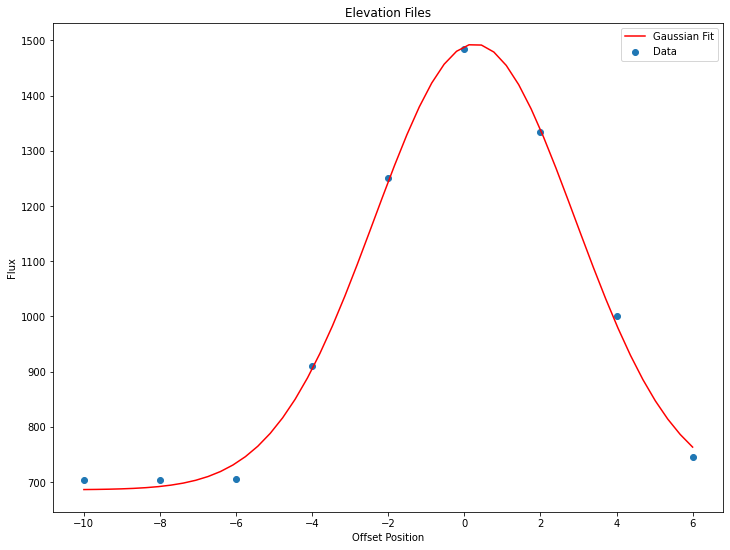

In [8]:
# Data import
datadir='Radio Data Sun'
filenames = glob(datadir + "/sun_el*") # Now only read in elevation files
filenames.sort()
print(filenames)

run_avgflux = []

# Same reading method as last cell
for l in filenames:
  f = open(l)
  lines = f.readlines()
  f.close()
  data = []
  mean_t = np.zeros([1024])
  data_t = np.zeros([1024])

  # Every fourth line is a separate spectrum at a different time
  # Must parse the 4th line into floats for numpy array
  i = 0
  j = 0
  while i <= len(lines)-1:
    k = 3 + i
    data = np.fromstring(lines[k],dtype=float, sep = ' ')
    data_t += data
    i += 4
    j += 1
  data_t = data_t / j # Taking the mean of each file 

  # For every file, find average flux
  avgflux = np.zeros(len(data_t))
  avgflux = np.mean(data_t[200:600]) # Using the same x-range as above
  run_avgflux.append(avgflux)

# x-range from -10 to 6 degrees, as data files are labeled 
loc = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6])
flux = np.array([run_avgflux[5], run_avgflux[4], run_avgflux[3], run_avgflux[2], run_avgflux[1], run_avgflux[0], run_avgflux[6], run_avgflux[7], run_avgflux[8]])

# Graph Details
plt.scatter(loc,flux, label='Data')
plt.xlabel("Offset Position")
plt.ylabel("Flux")
plt.title("Elevation Files")

# Fitting a Gaussian
# Define more detailed x array so the fit is smooth
loc3 = np.linspace(-10,6)

p0 = [max(flux), -4., 3., 1.] # Starter values
coeff, var_matrix = curve_fit(gaus, loc, flux, p0=p0)
fit2 = gaus(loc3, *coeff) 

# Graph
plt.plot(loc3,fit2,'r',label='Gaussian Fit')
plt.legend()
print(coeff)

In [9]:
sd_e = 0.04614626299638 # rad , 2.64398611 deg
fwhm_e = 2*np.sqrt(2*(np.log(2)))*sd_e
print(fwhm_e)

0.10866614510714558
